In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('scr-dataset.csv')
df

,x,y
0,1.0,1.750768
1,1.1,1.699704
2,1.2,1.607502
3,1.3,1.479060
4,1.4,1.320438
...,...,...
435,44.5,1.354955
436,44.6,1.523446
437,44.7,1.648505
438,44.8,1.727490


## Points to note
1. x is at a stepping range from 1.0 to 44.0 with a step = 0.1
2. Explaining the 440 rows

In [3]:
df.describe()

,x,y
count,440.000000,440.000000
mean,22.950000,0.000708
std,12.716131,1.001561
min,1.000000,-1.760149
25%,11.975000,-0.571808
50%,22.950000,-0.002649
75%,33.925000,0.592413
max,44.900000,1.760160


## From the statistics
1. y variable is almost normally distributed --> mean ~ 0 and standard deviation ~ 1
2. y also ranges roughly between -1.76 to +1.76 --> it is also possible that y is onyl restricted to be in this range, suggesting a possible oscillating, sinusoidal, or trend-based pattern, plot the distribution for a better understanding
3. x is in a stepping range of values which might have a one to many relationship to y, plot for a better understanding


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       440 non-null    float64
 1   y       440 non-null    float64
dtypes: float64(2)
memory usage: 7.0 KB


In [7]:
df.duplicated().sum()

0

### No null values or duplicates

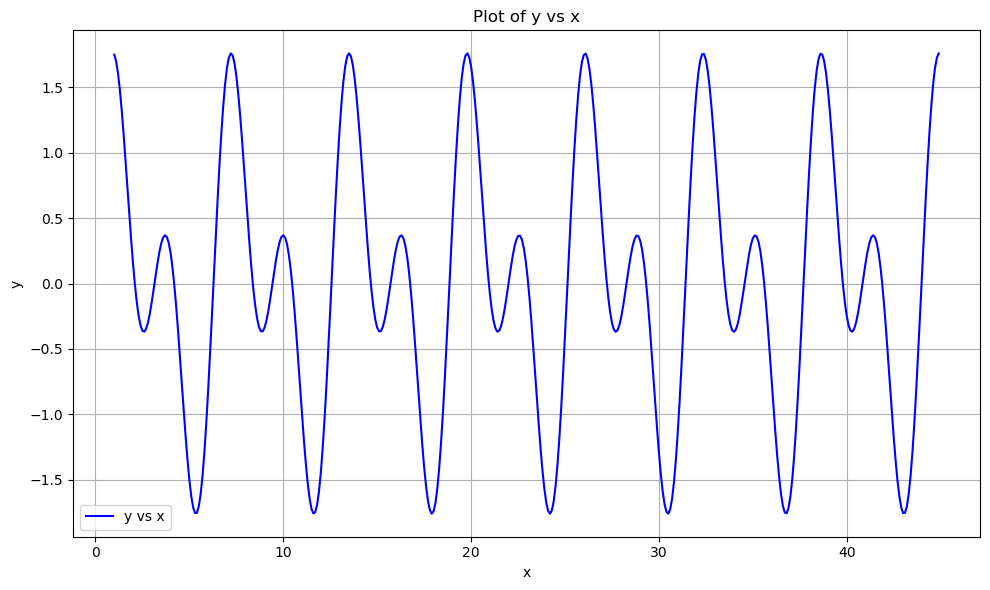

In [8]:
import matplotlib.pyplot as plt

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(df['x'], df['y'], label='y vs x', color='blue')
plt.title('Plot of y vs x')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


### 
1. y and x share a signal/wave like oscillating pattern, possible sinosidual
2. the inital hypothesis of x sharing a one to many relationship seems to be proven correctly

## Finding repition

In [27]:
from scipy.signal import find_peaks

x = df.loc[:, 'x'].values
y = df.loc[:, 'y'].values

In [48]:
peak_intervals

array([3.5, 2.8, 3.5, 2.8, 3.5, 2.8, 3.5, 2.7, 3.6, 2.7, 3.5, 2.8])

#### Tweaking the parameter of prominence to 1.0 to only capture the topmost peak

In [30]:
# Find peaks in the y-values to estimate the period
peaks, _ = find_peaks(y)

# Extract the x-values at peak locations
peak_x_values = x[peaks]

# Calculate the differences between consecutive peaks
peak_intervals = np.diff(peak_x_values)

# Average period
average_period = np.mean(peak_intervals)

# First repetition start point
repeat_start_x = peak_x_values[0] + average_period



In [31]:
print(f"Peak x values: {peak_x_values}")
print(f"Peak y values: {peaks}")
print(f"Peak intervals: {peak_intervals}")
print(f"Avg Period: {average_period}")
print(f"First repition: {repeat_start_x}")

Peak x values: [ 3.7  7.2 10.  13.5 16.3 19.8 22.6 26.1 28.8 32.4 35.1 38.6 41.4]
Peak y values: [ 27  62  90 125 153 188 216 251 278 314 341 376 404]
Peak intervals: [3.5 2.8 3.5 2.8 3.5 2.8 3.5 2.7 3.6 2.7 3.5 2.8]
Avg Period: 3.1416666666666693
First repition: 6.84166666666667


## Visualizing the above repition to match our plot

In [40]:
np.interp(peak_xs, df['x'], df['y'])

array([0.36887195, 1.75932564, 0.36892414, 1.76016035, 0.36809775,
       1.75968632, 0.36638182, 1.75791246, 0.36629604, 1.75484897,
       0.36802327, 1.7573212 , 0.3688965 ])

In [42]:
df.loc[27]

x    3.700000
y    0.368872
Name: 27, dtype: float64

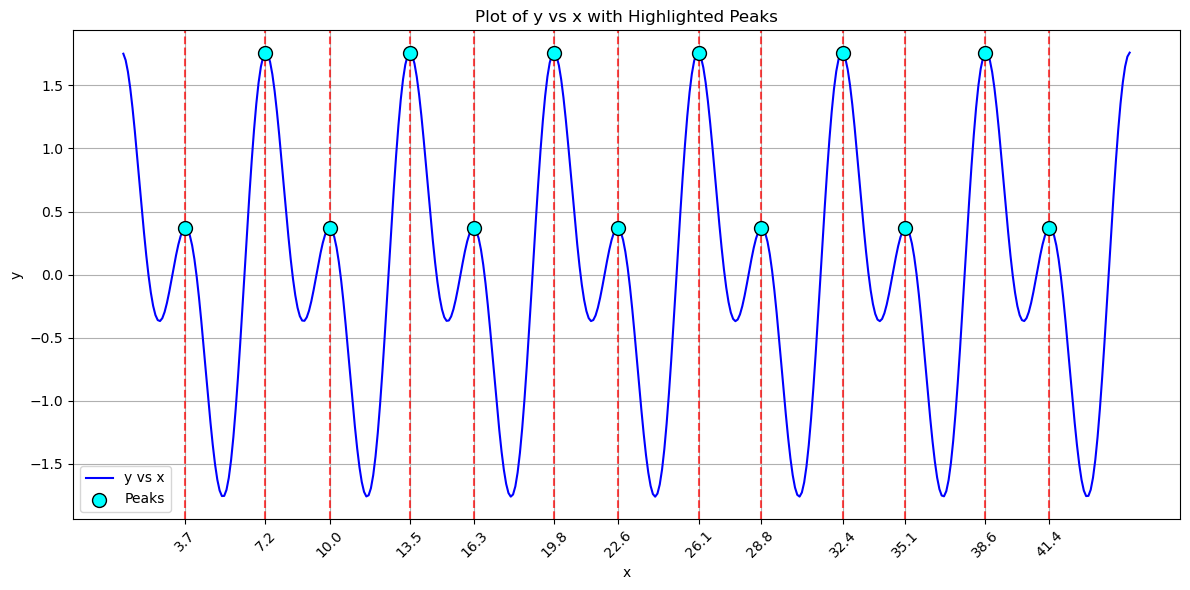

In [44]:
import matplotlib.pyplot as plt

# Define peak x-values and y-values
peak_xs = [3.7, 7.2, 10.0, 13.5, 16.3, 19.8, 22.6, 26.1, 28.8, 32.4, 35.1, 38.6, 41.4]
peak_ys = [27, 62, 90, 125, 153, 188, 216, 251, 278, 314, 341, 376, 404]

# Plotting the data
plt.figure(figsize=(12, 6))
plt.plot(df['x'], df['y'], label='y vs x', color='blue')

# Draw vertical lines at peak x-values
for x in peak_xs:
    plt.axvline(x=x, color='red', linestyle='--', alpha=0.7)

# Set x-ticks and labels at peak positions
plt.xticks(peak_xs, [f'{x:.1f}' for x in peak_xs], rotation=45)

# Highlight peak points with red circles
plt.scatter(peak_xs, np.interp(peak_xs, df['x'], df['y']), color='cyan', s=100, edgecolor='black', zorder=5, label='Peaks')

# Title and labels
plt.title('Plot of y vs x with Highlighted Peaks')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [21]:
# Define specific x-values where you want xlabels and vertical lines
special_xs = [10, 30, 50, 70, 90]

# Add vertical lines and x-tick labels
for val in special_xs:
    plt.axvline(x=val, color='red', linestyle='--', alpha=0.7)

# Set x-ticks only at the special x-values
plt.xticks(special_xs, [f'x={v}' for v in special_xs])

In [52]:

x = df.loc[:, 'x'].values
y = df.loc[:, 'y'].values

In [54]:
from scipy.signal import find_peaks

# Find only prominent peaks (adjust prominence value as needed)
peaks, properties = find_peaks(y, prominence=1.0)

# Extract the x-values at prominent peak locations
peak_x_values = x[peaks]

# Calculate the differences between consecutive dominant peaks
peak_intervals = np.diff(peak_x_values)
average_period = np.mean(peak_intervals)

# First repetition start point
repeat_start_x = peak_x_values[0] + average_period

# Print or plot as needed
print(peak_x_values, average_period, repeat_start_x)


[ 7.2 13.5 19.8 26.1 32.4 38.6] 6.2800000000000065 13.480000000000011


## Making a sinusoidal model

In [45]:
from scipy.optimize import curve_fit

# Define a sinusoidal model
def sinusoidal_model(x, A, B, C, D):
    return A * np.sin(B * x + C) + D

# Fit the model to the data
x_data = df['x'].values
y_data = df['y'].values
params, _ = curve_fit(sinusoidal_model, x_data, y_data, p0=[1, 0.2, 0, 0])


In [47]:
y_pred = sinusoidal_model(50, *params)
params, y_pred

(array([-0.0457062 ,  0.21621662, -1.26188057,  0.00579705]),
 0.01145793111277079)